[ 2.9999997   4.00000328  4.99999354]
[ 2.49999999  3.00000004  5.00000006]


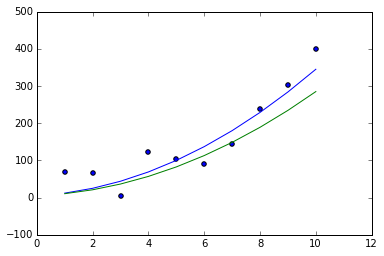

In [1]:
## Simple minimise example
# so far havent made it work with any other function...

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1.0,10,10)
y_exact = 3*x**2 + 4*x +5
#y_data = np.array([2.0,30,25,60,60,95,180,170,220,320])
y_data = y_exact + 30*np.random.randn(len(x))

#def fitfunc(p, x):
#    ## The Equation to fit##
#    func = p[0]*(x**2) + p[1]*x + p[2]
#    return func

#def errfunc(p, x, y):
#    return fitfunc(p,x) -y

guess = np.array([1.0,1.0,1.0])

#fun = lambda p: (p[0] - 1)**2 + (p[1] - 2.5)**2
fun = lambda p: sum((y_exact-(p[0]*(x**2) + p[1]*x+p[2]))**2)
res1 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10)
print(res1.x)
#print(res1.x[1])

yfit1 = res1.x[0]*x**2 + res1.x[1]*x + res1.x[2]

bnds = ((1, 2.5), (0, 3.0), (0,5))
res2 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
print(res2.x)

yfit2 = res2.x[0]*x**2 + res2.x[1]*x + res2.x[2]

plt.scatter(x,y_data)
plt.plot(x,yfit1)
plt.plot(x,yfit2)

##Replace lambda functions with normal functions

[ 2.9999997   4.00000328  4.99999354]
[ 2.49999999  3.00000004  5.00000006]


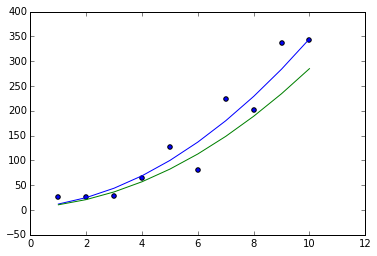

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1.0,10,10)
y_exact = 3*x**2 + 4*x +5
#y_data = np.array([2.0,30,25,60,60,95,180,170,220,320])
y_data = y_exact + 30*np.random.randn(len(x))

def fitfunc(p):
    ## The Equation to fit##
    func = p[0]*(x**2) + p[1]*x+p[2]
    return func

##This works as a single fucntion. Ideally split into 2 parts (1=eqn, 2 = dif of squares)
#def fun(p):
#    return sum((y_exact-(p[0]*(x**2) + p[1]*x+p[2]))**2)

def fun(p):
    return sum((y_exact-fitfunc(p))**2)

guess = np.array([1.0,1.0,1.0])

res1 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10)
print(res1.x)

yfit1 = res1.x[0]*x**2 + res1.x[1]*x + res1.x[2]

bnds = ((1, 2.5), (0, 3.0), (0,5))
res2 = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
print(res2.x)

yfit2 = res2.x[0]*x**2 + res2.x[1]*x + res2.x[2]

plt.scatter(x,y_data)
plt.plot(x,yfit1)
plt.plot(x,yfit2)

##Now fit TCP curves to prove principle

###Import Data + libraries

In [3]:
import numpy as np
import pandas as pd
import os
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/' #Files are explicitely specified here and broken into 2 parts 
filepath = 'Data to Import/Prostate Outcome Summary 270515.txt' #so as to be <79 characters
#filepath = 'Data to Import/Prostate Outcome Summary 270515-2.txt'
cwd = os.getcwd()

fullpath=cwd+filepath
print(fullpath)

data = pd.read_table(filepath)
data.rename(columns={data.columns[0]: 'Study'}, inplace=True) # Rename the Study column which is unnamed int he original file

groups = data.groupby('Study')  # assign groups to the studys
data['TCP'] = data['TCP']
data # .head shows the first 5 rows of data, .tail last 5 rows

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPythonData to Import/Prostate Outcome Summary 270515.txt


,Study,Dose,TCP
0,RT01,64,43
1,RT01,74,55
2,MD Anderson,70,43
3,MD Anderson,78,62
4,RMH,64,59
5,RMH,74,71
6,Fox Chase Low-All,69,68
7,Fox Chase Low-All,71,74
8,Fox Chase Low-All,76,69
9,Fox Chase Low-Unf,69,44


##Original fitting attempt - curve_fit

In [5]:
def fit(D, a_fit, b_fit):                      #define TCP function to fit
    s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    TCP = 100*np.exp(-s)
    return TCP

d=2.0 #dose per fraction
N=10**6 #number of tumour cells

x = data.Dose
y = data.TCP

p0 = [0.05,0.001] # intial estimates of fit parameters

xman = np.linspace(0.0, 100.0, 100.0)              # for plotting manually calculated function with initial values
yman = fit(xman, p0[0], p0[1])                # basic fitting function. Doesnt work too well as cant constrain

coeffs, matcov = curve_fit(fit, x, y, p0)      # fit curve against x and y data sets

xfit = np.linspace(0.0, 100.0, 100.0)         # give finer resultion array for plot
yfit = fit(xfit, *coeffs)                    # calculate fitted data with fine array

plt.plot(x, y, 'o')
plt.plot(xfit, yfit, 'r--', label='fit')                  # plot calculated and maual fits
plt.plot(xman, yman, 'r-', label='manual')                       # dashed line is auto fit, solid is manual fit.... these should be the same!!!
plt.legend(loc='best')
print(*coeffs)


NameError: name 'curve_fit' is not defined

##SciPy.Optimize minimisation of function and then plot fit results

[ 0.36735487 -0.00118242]
[ 0.19613454  0.        ]


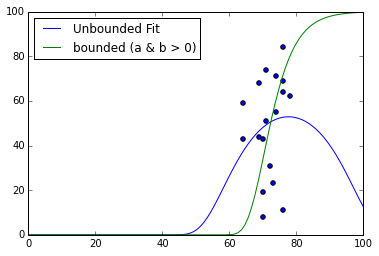

In [6]:
#sub_data = data[data['Study'].isin(['RMH'])]
#x_data = sub_data['Dose']
#y_data = sub_data['TCP']

x_data = data.Dose
y_data = data.TCP

d=2.0 #dose per fraction
N=10**6 #number of tumour cells

def fitfunc(p):                      #define TCP function to fit
    #s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    s = N*np.exp(-p[0]*x_data - p[1]*d*x_data**2)
    TCP = 100*np.exp(-s)
    return TCP

def fitfunc1(p):                      #define TCP function to fit
    #s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    s = N*np.exp(-p[0]*x_data - p[1]*d*x_data**2)
    TCP = 100*np.exp(-s)
    return TCP

## returns the cum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([0.1,0.001])
bnds = ((0.0, None), (0.0, None)) # Force parameters to be positive


res1 = optimize.minimize(fun, guess, method='TNC', tol=1e-10)
print(res1.x)

res2 = optimize.minimize(fun, guess, method='TNC', tol=1e-10, bounds=bnds)
print(res2.x)

x_fit = np.linspace(0.0, 100.0, 100.0)
sfit1 = N*np.exp(-res1.x[0]*x_fit - res1.x[1]*d*x_fit**2)
yfit1 = 100*np.exp(-sfit1)

sfit2 = N*np.exp(-res2.x[0]*x_fit - res2.x[1]*d*x_fit**2)
yfit2 = 100*np.exp(-sfit2)

plt.scatter(x_data,y_data)
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot(x_fit,yfit1, label='Unbounded Fit')
plt.plot(x_fit,yfit2, label='bounded (a & b > 0)')
plt.legend(loc='best')

##Find the gradient

In [7]:
g = np.gradient(yfit2)
g[80]

2.283584977675666

##Add plot of gradient on right hand axes

[ 0.19613454  0.        ]


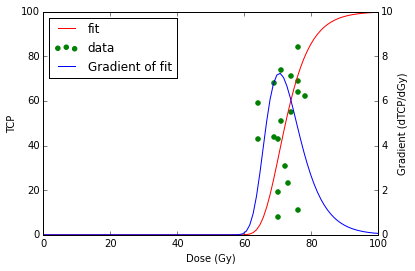

In [8]:
#sub_data = data[data['Study'].isin(['RT01'])]
#x_data = sub_data['Dose']
#y_data = sub_data['TCP']

x_data = data.Dose
y_data = data.TCP

d=2.0 #dose per fraction
N=10**6 #number of tumour cells

def fitfunc(p):                      #define TCP function to fit
    #s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    s = N*np.exp(-p[0]*x_data - p[1]*d*x_data**2)
    TCP = 100*np.exp(-s)
    return TCP

## returns the cum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([0.1,0.001])
bnds = ((0.0, None), (0.0, None)) # Force parameters to be positive

res2 = optimize.minimize(fun, guess, method='TNC', tol=1e-10, bounds=bnds)
print(res2.x)

x_fit = np.linspace(0.0, 100, 100)
sfit2 = N*np.exp(-res2.x[0]*x_fit - res2.x[1]*d*x_fit**2)
yfit2 = 100*np.exp(-sfit2)

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = 'data')
ax1.plot(x_fit,yfit2, color='red', label = 'fit')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,np.gradient(yfit2, 100/len(x_fit)), color='blue', label='Gradient of fit')
ax2.set_ylabel('Gradient (dTCP/dGy)')
ax2.set_ylim(0,10)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

##Add in N as a variable

[  9.31391368e-02   1.00000000e-03   1.80010049e+07]
a/b:  93.1391367534


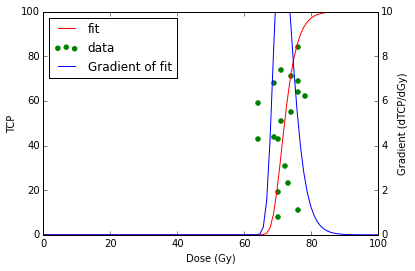

In [9]:
#sub_data = data[data['Study'].isin(['RT01'])]
#x_data = sub_data['Dose']
#y_data = sub_data['TCP']

x_data = data.Dose
y_data = data.TCP

d=2.0 #dose per fraction
#N=10**6 #number of tumour cells

def fitfunc(p):                      #define TCP function to fit
    #s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    s = p[2]*np.exp(-p[0]*x_data - p[1]*d*x_data**2)
    TCP = 100*np.exp(-s)
    return TCP

## returns the cum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([0.1,0.001, 10**6])
bnds = ((0.0, None), (0.001, None), (10**3, 10**9)) # Force parameters to be positive

res2 = optimize.minimize(fun, guess, method='TNC', tol=1e-10, bounds=bnds)
print(res2.x)

x_fit = np.linspace(0.0, 100, 100)
sfit2 = res2.x[2]*np.exp(-res2.x[0]*x_fit - res2.x[1]*d*x_fit**2)
yfit2 = 100*np.exp(-sfit2)

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = 'data')
ax1.plot(x_fit,yfit2, color='red', label = 'fit')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,np.gradient(yfit2, 100/len(x_fit)), color='blue', label='Gradient of fit')
ax2.set_ylabel('Gradient (dTCP/dGy)')
ax2.set_ylim(0,10)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
print("a/b: ", res2.x[0]/res2.x[1])

##Next want to set a constraint on a/b ?

Plot doesnt seem to fit when only using the individual data sets properly....?
Could also try different form of fitting equation (logistic for example)

[  1.00037208e-01   9.54531474e-04   1.94087950e+07]


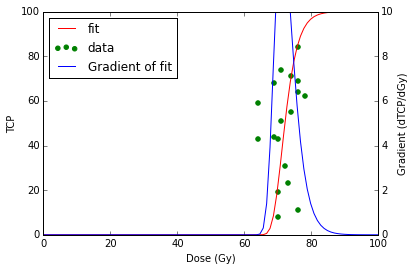

In [10]:
#sub_data = data[data['Study'].isin(['RT01'])]
#x_data = sub_data['Dose']
#y_data = sub_data['TCP']
#print(x_data)

x_data = data.Dose
y_data = data.TCP

d=2.0 #dose per fraction
#N=10**6 #number of tumour cells

def fitfunc(p):                      #define TCP function to fit
    #s = N*np.exp(-a_fit*D - b_fit*d*D**2)
    s = p[2]*np.exp(-p[0]*x_data - p[1]*d*x_data**2)
    TCP = 100*np.exp(-s)
    return TCP

## returns the cum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([0.1,0.001, 10**6])
bnds = ((0.0, None), (0.0, None), (10**6, 10**12)) # Force parameters to be positive

res2 = optimize.minimize(fun, guess, method='TNC', tol=1e-10, bounds=bnds)
print(res2.x)

x_fit = np.linspace(0.0, 100, 100)
sfit2 = res2.x[2]*np.exp(-res2.x[0]*x_fit - res2.x[1]*d*x_fit**2)
yfit2 = 100*np.exp(-sfit2)

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = 'data')
ax1.plot(x_fit,yfit2, color='red', label = 'fit')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,np.gradient(yfit2, 100/len(x_fit)), color='blue', label='Gradient of fit')
ax2.set_ylabel('Gradient (dTCP/dGy)')
ax2.set_ylim(0,10)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

#More realistic curves to model whole population
###From Handbook fo Rad Phys

More realisitcally the TCP curves are not this steep due the variance in radiosensitivity within the population.
Nahum et al. describe how to add an additional parameter to include this within the model.
Hopefully this should give better fits to the single data sets (allowing shallower curves).
The models sums up a range of TCP fits with different weightings to produce an overall TCP fit.

page 735 in Handbook of Radiotehrapy Physics. gives the below:
(Also in paper which is mentioned in book. Sanchez-Nieto and Nahum, 1999)

This $\sqrt{3x-1}+(1+x)^2$ is an example inline equation

$TCP = P(N,0) = e^{-N}$

$TCP = exp{-N*exp[-a*D(1+\frac{b}ad)]}$

Need to incorperate a spread in alpha (a) values

For k groups of patients each with seperate $a_i$ the value of $TCP_i$ overall is given by:

$\sum_{i=1}^k g_i TCP_{a_i}$ where $g_i$  of patients have $a=a_i$ and $\sum g_i =1$.

For a Gaussian distribution (lets assume this): $g_i \varpropto exp[-(a_i - a_m)^2 / 2s_a^2]$
where $s$ is the standard deviation of $a$ and $a_m$ is its mean

An alternative way to evalute the overall TCP is then:

$TCP = (1/k)\sum_{i=1}^k exp(-N(i))$

where $N(i) = Nexp(-a_i D)$ and N is the initial number of cells taken to be $pV$ where $p=10^7 cm^{-3}$ and $V$ is the tumour volume in $cm^3$

Combining gives:

$TCP = (1/k) \sum_{i=1}^k exp[-pVexp(-a_i D)]$

setting the SD of alpha gives the usual steep TCP curves

##Can just model using info from ESTRO presentation
###This uses gamma50 and d50 to fit a model which is a better fit to population data
Based on Bentzens paper. gives 3 different forms of model to use.

$TCP = 1/(1+exp[4g_{50}(1-D/_{D50})])$ is logistic model

[  1.00037208e-01   9.54531474e-04   1.94087950e+07]
Trial, Gamma50, D50, Gamma74
RT01:  0.842492013229 69.8415185526 1.20133630471


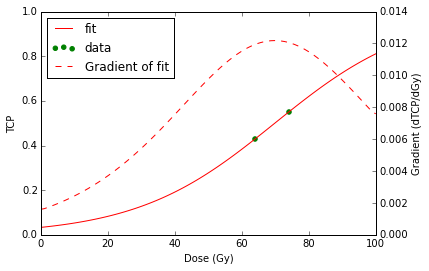

In [11]:
sub_data = data[data['Study'].isin(['RT01'])]
#sub_data = data[data['Study'].isin(['MD Anderson'])]
#sub_data = data[data['Study'].isin(['RMH'])]
#sub_data = data[data['Study'].isin(['Fox Chase Med'])]

x_data = sub_data['Dose']
y_data = 0.01*sub_data['TCP']
#print(x_data)

#x_data = data.Dose
#y_data = 0.01*data.TCP

def fitfunc(p):                      #define TCP function to fit
    TCP = 1/(1+np.exp(4*(p[0]*(1-(x_data/p[1])))))
    return TCP

## returns the sum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([1.0,60.0])
bnds = ((0.3, 10), (30, 100)) # Force parameters to be positive

res = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
print(res2.x)

x_fit = np.linspace(0.0, 100, 100)
yfit_rt01 = 1/(1+np.exp(4*(res.x[0]*(1-(x_fit/res.x[1])))))

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = 'data')
ax1.plot(x_fit,yfit_rt01, color='red', label = 'fit')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,1)
ax1.set_xlim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,np.gradient(yfit_rt01, 100/len(x_fit)), color='red', ls='dashed', label='Gradient of fit')
ax2.set_ylabel('Gradient (dTCP/dGy)')
#ax2.set_ylim(0,1)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

g = 100*np.gradient(yfit_rt01, 100/len(x_fit))
g74=g[74]

print("Trial, Gamma50, D50, Gamma74")
print("RT01: ", res.x[0], res.x[1], g74)


Trial, Gamma50, D50
RT01:  0.842498337347 69.8412098135
MD Anderson:  1.75790113754 72.923021042
RMH:  0.759297576379 57.1513235625
Fox Chase Low-All:  0.3 41.8541044255 Large error in fit (manually adjusted limits for parameters)
Fox Chase Low-Unf:  2.0382873516 70.9091385132
Fox Chase Med:  9.96748391355 73.1852608504
Fox Chase High:  5.75579625646 80.0 Large error in fit (manually adjusted limits for parameters)



##Put data into an array then into pandas dataframe
Ideally this should be automatic and calc for all trials within the data file...
**Automation is something to mention in confirmation report**

In [12]:
fit_data = np.array([['RT01', 0.842498337347, 69.8412098135,1.20133630471, 'None'],
                     ['RMH', 0.759297576379, 57.1513235625,1.08651400899, 'None'],
                     ['MD Anderson', 1.75790113754, 72.923021042,2.41436353966, 'None'],
                     ['Fox Chase Low-All', 0.3, 41.8541044255,0.584182231636, 'Not a good fit'],
                     ['Fox Chase Low-Unfavourable', 2.0382873516, 70.9091385132,2.76395623366, 'None'],
                     ['Fox Chase Med', 9.96748391355, 73.1852608504, 11.3881977613, 'None'],
                     ['Fox Chase High', 5.75579625646, 80.0, 0.887696792319, 'Not a good fit']])
#fit_data

In [13]:
fit_data_pd = pd.DataFrame(fit_data, columns=['Trial', 'Gamma50','D50','Gamma74', 'Comments'])
fit_data_pd

,Trial,Gamma50,D50,Gamma74,Comments
0,RT01,0.842498337347,69.8412098135,1.20133630471,None
1,RMH,0.759297576379,57.1513235625,1.08651400899,None
2,MD Anderson,1.75790113754,72.923021042,2.41436353966,None
3,Fox Chase Low-All,0.3,41.8541044255,0.584182231636,Not a good fit
4,Fox Chase Low-Unfavourable,2.0382873516,70.9091385132,2.76395623366,None
5,Fox Chase Med,9.96748391355,73.1852608504,11.3881977613,None
6,Fox Chase High,5.75579625646,80.0,0.887696792319,Not a good fit


In [14]:
# Save fit parameters to excel sheet called 'output'

from pandas import ExcelWriter
writer = ExcelWriter('output.xlsx')
fit_data_pd.to_excel(writer,'Sheet1')
writer.save()

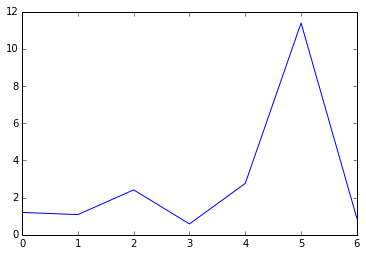

In [15]:
# Describe the G74 data and show range on graph

g74all = fit_data_pd['Gamma74'].convert_objects(convert_numeric=True)

g74all.describe()
plt.plot(g74all)


##Now try and add a Poisson model for comparison
It is expected that there will not be a huge difference, but useful for the Thesis to have this.

In [16]:
e = np.exp(1)
e

2.7182818284590451

[  0.92124432 100.        ]
Trial, Gamma37, D37, Gamma74
FC high:  0.921244324034 100.0 0.724845431216


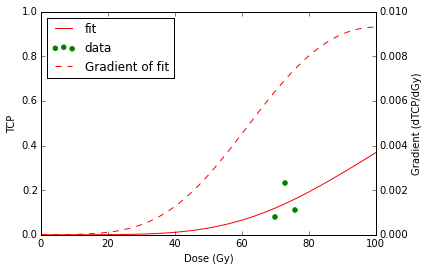

In [17]:
#sub_data = data[data['Study'].isin(['RT01'])]
#sub_data = data[data['Study'].isin(['RMH'])]
#sub_data = data[data['Study'].isin(['MD Anderson'])]
#sub_data = data[data['Study'].isin(['Fox Chase Low-All'])]
#sub_data = data[data['Study'].isin(['Fox Chase Low-Unf'])]
#sub_data = data[data['Study'].isin(['Fox Chase Med'])]
sub_data = data[data['Study'].isin(['Fox Chase High'])]

x_data = sub_data['Dose']
y_data = 0.01*sub_data['TCP']
#print(x_data)

#x_data = data.Dose
#y_data = 0.01*data.TCP

def fitfunc(p):                      #define TCP function to fit
    #TCP = 1/(1+np.exp(4*(p[0]*(1-(x_data/p[1])))))
    TCP = np.exp(-np.exp(np.exp(1)*p[0]*(1-(x_data/p[1]))))
    return TCP

## returns the sum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

#Initial guess of parameters
guess = np.array([1.0,60.0])
bnds = ((0.01, 10), (0, 100)) # Force parameters to be positive

#res = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
res = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
print(res.x)

x_fit = np.linspace(0.0, 100, 100)
#yfit_rt01 = 1/(1+np.exp(4*(res.x[0]*(1-(x_fit/res.x[1])))))
yfit_rt01 = np.exp(-np.exp(np.exp(1)*res.x[0]*(1-(x_fit/res.x[1]))))

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = 'data')
ax1.plot(x_fit,yfit_rt01, color='red', label = 'fit')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,1)
ax1.set_xlim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,np.gradient(yfit_rt01, 100/len(x_fit)), color='red', ls='dashed', label='Gradient of fit')
ax2.set_ylabel('Gradient (dTCP/dGy)')
#ax2.set_ylim(0,1)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

g = 100*np.gradient(yfit_rt01, 100/len(x_fit))
g74=g[74]

print("Trial, Gamma37, D37, Gamma74")
print("FC high: ", res.x[0], res.x[1], g74)


In [18]:
fit_data_p = np.array([['RT01', 0.749407591105, 59.0802153444, 1.13307276627, 'None'],
                     ['RMH', 0.782253891558, 49.205192106, 1.03901419754, 'None'],
                     ['MD Anderson', 0.76729939103, 67.6123804217, 2.36603250256, 'None'],
                     ['Fox Chase Low-All', 0.01, 1.82643990136, 0.362256802799, 'Not a good fit'],
                     ['Fox Chase Low-Unfavourable', 2.12122701618, 66.6069492601, 2.635667343, 'None'],
                     ['Fox Chase Med', 9.66691443532, 71.9494967904, 9.27248294077, 'None'],
                     ['Fox Chase High', 0.921244324034, 100.0, 0.724845431216, 'Not a good fit']])
#fit_data_p

fit_data_p_pd = pd.DataFrame(fit_data_p, columns=['Trial', 'Gamma37','D37','Gamma74', 'Comments'])
fit_data_p_pd

,Trial,Gamma37,D37,Gamma74,Comments
0,RT01,0.749407591105,59.0802153444,1.13307276627,None
1,RMH,0.782253891558,49.205192106,1.03901419754,None
2,MD Anderson,0.76729939103,67.6123804217,2.36603250256,None
3,Fox Chase Low-All,0.01,1.82643990136,0.362256802799,Not a good fit
4,Fox Chase Low-Unfavourable,2.12122701618,66.6069492601,2.635667343,None
5,Fox Chase Med,9.66691443532,71.9494967904,9.27248294077,None
6,Fox Chase High,0.921244324034,100.0,0.724845431216,Not a good fit


In [19]:
# Save fit parameters to excel sheet called 'output'

from pandas import ExcelWriter
writer = ExcelWriter('output.xlsx')
fit_data_p_pd.to_excel(writer,'Sheet1')
writer.save()

###Want to plot graph with all fits...
- Start a new notebook with these fits now they work.
- Want to make them into better functions eventually...

#####Also do weighted least squares (weighted by a factor derived from the error on each point).


Least squares minimisation: $\sum_{i=1}^n (y - y_{fit})^2$

Weighted Least squares minimisation: $\sum_{i=1}^n w_i(y - y_{fit})^2$ where $w_i$ is a weighting factor for each point

If use SD as the error, then the weighting factor is 1/SD (larger error = smaller weighting).
Obviously this doesn't do anything if there is only 2 points which is the case most of the time.

constraints can be used to restrict a>0, b>0, a/b > 1 etc. e.g. x[0] > 0, x[0]/x[1] > 1
This is in place of bounds which limit the values to between certain numbers as above. (min,max)


######Says one minus the sum of all variables must be zero
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})               #this says that 1-sum(all aprams)=0 ('eq' = 0) Can only set = 0 or not=0 [in

######Required to have non negative values
bnds = tuple((0,None) for x in start_pos)         #if just want all vals to be positive could do this

http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html shows example

In [20]:
>>> cons = ({'type': 'eq',
...          'fun' : lambda x: np.array([x[0]**3 - x[1]]),               #(x^3 - y = 0)
...          'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
...         {'type': 'ineq',
...          'fun' : lambda x: np.array([x[1] - 1]),                      #(y - 1 = 0)
...          'jac' : lambda x: np.array([0.0, 1.0])})

##Now plot logistic + Poisson on same graph

Fit, Gamma50/37, D50/37, Gamma74
Logistic:  0.3 41.8541044255 0.584182231636
Poisson:  0.3 31.5232520453 0.615994121191


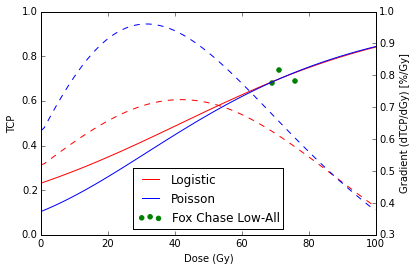

In [150]:
data_label = 'Fox Chase Low-All' #RT01, RMH, MD Anderson, Fox Chase Low-All, Fox Chase Low-Unf, Fox Chase Med, Fox Chase High

sub_data = data[data['Study'].isin([data_label])] #get a particular studies data

x_data = sub_data['Dose']
y_data = 0.01*sub_data['TCP']

def fitfunc(p):                      #define TCP function to fit - Logistic
    TCP = 1/(1+np.exp(4*(p[0]*(1-(x_data/p[1])))))
    return TCP

## returns the sum of squares of the fitting function
def fun(p):
    return sum((y_data-fitfunc(p))**2)

def fitfunc2(q):                      #define TCP function to fit - Poisson
    #TCP = 1/(1+np.exp(4*(p[0]*(1-(x_data/p[1])))))
    TCP = np.exp(-np.exp(np.exp(1)*q[0]*(1-(x_data/q[1]))))
    return TCP

## returns the sum of squares of the fitting function
def fun2(q):
    return sum((y_data-fitfunc2(q))**2)

#Initial guess of parameters
guess = np.array([1.0,60.0])
bnds = ((0.3, 10), (30, 100)) # Force parameters to be positive

res = optimize.minimize(fun, guess, method='SLSQP', tol=1e-10, bounds=bnds)
#print(res.x)

x_fit = np.linspace(0.0, 100, 100)
yfit = 1/(1+np.exp(4*(res.x[0]*(1-(x_fit/res.x[1])))))

res3 = optimize.minimize(fun2, guess, method='SLSQP', tol=1e-10, bounds=bnds)
#print(res3.x)

x_fit2 = np.linspace(0.0, 100, 100)
yfit2 = np.exp(-np.exp(np.exp(1)*res3.x[0]*(1-(x_fit/res3.x[1]))))

fig, ax1 = plt.subplots()
ax1.scatter(x_data,y_data, color='green', label = data_label)
ax1.plot(x_fit,yfit, color='red', label = 'Logistic')
ax1.plot(x_fit,yfit2,color='blue', label = 'Poisson')
ax1.set_xlabel('Dose (Gy)')
ax1.set_ylabel('TCP')
ax1.set_ylim(0,1)
ax1.set_xlim(0,100)

ax2 = ax1.twinx()
ax2.plot(x_fit,100*np.gradient(yfit, 100/len(x_fit)), color='red', ls='dashed')
ax2.plot(x_fit,100*np.gradient(yfit2, 100/len(x_fit)), color='blue', ls='dashed')
ax2.legend(lines + lines2, labels + labels2, loc='lower center')
ax2.set_ylabel('Gradient (dTCP/dGy) [%/Gy]')
#ax2.set_ylim(0,1)
ax2.set_xlim(0,100)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

g = 100*np.gradient(yfit, 100/len(x_fit))
g2 = 100*np.gradient(yfit2, 100/len(x_fit))
g74=g[74]
g74_2=g2[74]

print("Fit, Gamma50/37, D50/37, Gamma74")
print("Logistic: ", res.x[0], res.x[1], g74)
print("Poisson: ", res3.x[0], res3.x[1], g74_2)

savename = 'Curve_Fits/'+data_label+'.png'
plt.savefig(savename, bbox_inches='tight', dpi=300)


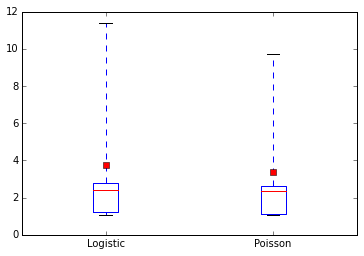

In [133]:
box_data_l = ([1.2,1.087,2.414,2.764,11.388])
box_data_p = ([1.13,1.039,2.366,2.636,9.723])
box_all = [box_data_l,box_data_p]
labels = list(['Logistic','Poisson'])

plt.boxplot(box_all, showmeans='false', labels=labels, whis='range')
#plt.show()

savename = 'Curve_Fits/PvsL_box.png'
plt.savefig(savename, bbox_inches='tight', dpi=300)

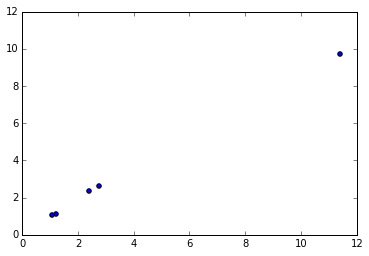

In [107]:
plt.scatter(box_data_l,box_data_p)
plt.show()

2.414 2.366


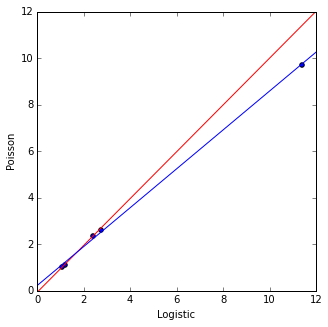

In [152]:
plt.figure(figsize=(5,5))
linfit = np.polyfit(box_data_l[0:3], box_data_p[0:3],1)
linfitall = np.polyfit(box_data_l, box_data_p,1)
xfit=np.linspace(0,12,20)
yfit= linfit[0]*xfit + linfit[1]
yfitall= linfitall[0]*xfit + linfitall[1]
plt.scatter(box_data_l, box_data_p)
plt.plot(xfit,yfit, color='red')
plt.plot(xfit,yfitall, color='blue')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xlabel('Logistic')
plt.ylabel('Poisson')
#plt.show()
savename = 'Curve_Fits/PvsL_linfit_fits.png'
plt.savefig(savename, bbox_inches='tight', dpi=300)
print(np.median(box_data_l), np.median(box_data_p))

###Now plot all Poisson Results on same graph